---
## Sorbonne Université
# <center> Mathématiques discrètes </center>
## <center> LU2IN005 </center>
## <div style="text-align:right;"> Année 2024-2025</div>
---

---
# <center> TME programmation d'automates finis </center>
L'objectif de ce TME est de programmer en python quelques uns des
algorithmes pour les automates finis vus en cours et en TD, en
utilisant des structures de données fournies dans le code mis à votre
disposition.
---
# Consignes
Copiez dans votre répertoire de travail les fichiers présents dans le Dossier 
*Fichiers Python fournis* de la page Moodle de l'UE.

Ils contiennent les définitions de structures de données décrites
ci-dessous, ainsi que des aide-mémoire sur l'utilisation de python.

**Le seul fichier que vous êtes autorisés à modifier** est celui-ci, c'est-à-dire
`automate_etudiant.ipynb`, partiellement prérempli. 
Les instructions `return` sont à supprimer lorsque
vous remplirez le contenu des différentes fonctions.  Les autres
fichiers n'ont pas besoin d'être lus (mais ils peuvent l'être).
Si votre programme nécessite de lire des fichiers, **ceux-ci doivent être enregistrés dans le répertoire ExemplesAutomates** que vous avez téléchargé.

Consigne très importante concernant les tests. Vous devez écrire des tests pour vos fonctions. Ces tests doivent être écrits dans les cellules de tests dédiées. Aucun test ne doit être écrit dans une autre cellule, et les cellules de tests ne doivent contenir aucune autre instruction que celles de votre test.
---

Les cellules de tests seront automatiquement effacées lors de l'évaluation de votre programme. 

_Binôme_
----------

**NOM**: RAKED       

**Prénom**: Ouerdia               

**Numéro d'étudiant**: 21315035     

**NOM**: ADIL

**Prénom**: Ania   

**Numéro d'étudiant**: 21318229



### Table des matières

> [1. Présentation](#sec1)
>> [1.1 La classe `State`](#sec1_1) <br>
>> [1.2 La classe `Transition`](#sec1_2) <br>
>> [1.3 La classe `Automate`](#sec1_3)

> [2. Prise en mains](#sec2)
>> [2.1 Création d'automates](#sec2_1) <br>
>> [2.2 Premières manipulations](#sec2_2) <br>

> [3. Exercices de base : tests et complétion](#sec3)

> [4. Déterminisation](#sec4)

> [5. Constructions sur les automates réalisant des opérations sur les langages acceptés](#sec5)
>> [5.1 Opérations ensemblistes sur les langages](#sec5_1) <br>
>> [5.2 Opérations rationnelles sur les langages](#sec5_2)

In [1]:
## Import des bibliothèques nécessaires au projet.
## Ne pas modifier les fichiers "bibliothèque".

## Interpréter cette cellule avant de continuer.

from transition import *
from state import *
import os
import copy
from automateBase import AutomateBase

class Automate(AutomateBase):
    pass

### 1. Présentation  <a class="anchor" id="sec1"></a>

Le projet utilise le langage python avec une syntaxe légèrement
différente de celle vue en **LU1IN001 / 011**, parce qu'il exploite en particulier
la notion de classes d'objets. Une introduction à cette notion est présentée dans le livre associé
au cours : cf [Chapitre 13](https://www-licence.ufr-info-p6.jussieu.fr/lmd/licence/2021/ue/LU1IN001-2021oct/cours2020.pdf).

De plus, le typage des variables est noté de façon légèrement différente, en commentaires, pour les déclarations
comme pour les arguments des fonctions. Pour ces derniers, les types sont indiqués dans la première ligne de la documentation de la fonction.

Les particularités sont brièvement expliquées en annexe
de ce document. Par ailleurs, vous trouverez dans la section
`projet` de la page Moodle un mémo sur la syntaxe python, ainsi que la carte de
référence du langage utilisée en **LU1IN001 / 011**.  On rappelle qu'une ligne
commençant par `#` est un commentaire, ignoré par
l'interpréteur.

Toutes les structures de données nécessaires à la construction des
automates sont fournies sous la forme de classes python, pour les
transitions d'un automate, ses états, et les automates
eux-mêmes. Cette section indique comment les utiliser.

#### 1.1 La classe `State` <a class="anchor" id="sec1_1"></a>

Un état est représenté par
- un entier `id` (type `int`) qui définit son identifiant,
- un booléen `init` (type `bool`) indiquant si c'est un état initial,
- un booléen `fin` (type `bool`) indiquant si c'est un état final,
- une chaîne de caractères `label` (type `str`) qui définit son étiquette, permettant de le *décorer*. Par défaut, cette variable est la version chaîne de caractères de l'identifiant de l'état. 

On définit l'alias de type `State` pour représenter les variables de ce type. 

Ainsi, l'instruction ci-dessous crée une variable `s` représentant un état d'identifiant `1`, qui est un état initial mais pas final, dont l'identifiant est aussi l'étiquette  `1` :

In [2]:
#CELLULE DE TEST
# s : State
s = State(1, True, False)

Si l'on souhaite avoir une étiquette différente de l'identifiant, on
utilise un quatrième argument :

In [3]:
#CELLULE DE TEST
s = State(1, True, False, 'etat 1') 

On accède ensuite aux différents champs de `s` par la notation pointée : exécutez les cellules suivantes pour observer l'affichage obtenu.

In [4]:
#CELLULE DE TEST
print('La valeur de s.id est : ')
print(s.id)

La valeur de s.id est : 
1


In [5]:
#CELLULE DE TEST
print('La valeur de s.init est : ')
print(s.init)

La valeur de s.init est : 
True


In [6]:
#CELLULE DE TEST
print('La valeur de s.fin est : ')
print(s.fin)

La valeur de s.fin est : 
False


In [7]:
#CELLULE DE TEST
print('La valeur de s.label est : ')
print(s.label)

La valeur de s.label est : 
etat 1


In [8]:
#CELLULE DE TEST
print("L'affichage de s est : ")
print(s)

L'affichage de s est : 
etat 1(init)


Ainsi, une variable de type `State` est affichée par son étiquette et, entre parenthèses, si c'est un état initial et/ou final.

#### 1.2 La classe `Transition` <a class="anchor" id="sec1_2"></a>

Une transition est représentée par 
- un état `stateSrc` (type `State`) correspondant à son état de départ
- un caractère `etiquette` (type `str`) donnant son   étiquette
- un état `stateDest` (type `State`) correspondant à son état de destination

On définit l'alias de type `Transition` pour représenter les variables de ce type.

La séquence d'instructions suivante crée la transition d'étiquette `"a"` de l'état `s` (défini ci-dessus) vers lui-même et affiche les différents champs de la transition :

In [9]:
#CELLULE DE TEST
# t : Transition
t = Transition(s, "a", s)

In [10]:
#CELLULE DE TEST
print('La valeur de t.etiquette est : ')
print(t.etiquette)

La valeur de t.etiquette est : 
a


In [11]:
#CELLULE DE TEST
print("L'affichage de t.stateSrc est : ")
print(t.stateSrc)

L'affichage de t.stateSrc est : 
etat 1(init)


On remarque que la variable `stateSrc` est de type `State`, on obtient donc un état, et non uniquement un
identifiant d'état. 

In [12]:
#CELLULE DE TEST
print("L'affichage de t.stateDest est : ")
print(t.stateDest)

L'affichage de t.stateDest est : 
etat 1(init)


In [13]:
#CELLULE DE TEST
print("L'affichage de t est : ")
print(t)

L'affichage de t est : 
[etat 1(init)-a->etat 1(init)]


#### 1.3 La classe `Automate` <a class="anchor" id="sec1_3"></a>

Un automate est représenté par
- l'ensemble de ses transitions `allTransitions` (de type `set[Transition]`) 
- l'ensemble de ses états `allStates` (de type `set[State]`)
- une étiquette `label` (de type `str`) qui est éventuellement vide.

On définit l'alias de type `Automate` pour représenter les variables de ce type.

Ainsi, de même que pour les classes précédentes, l'accès aux
différents champs se fait par la notation pointée. Par exemple, on
obtient l'ensemble des états d'un automate `monAutomate` par
l'instruction `monAutomate.allStates`.

Pour créer un automate, il existe trois possibilités.

**Création à partir d'un ensemble de transitions.**<br>
On peut d'abord utiliser le constructeur de signature `Automate : set[Transition] -> Automate`.<br>
Il déduit alors l'ensemble des états à partir de l'ensemble des transitions et définit par défaut l'étiquette
de l'automate comme la chaîne de caractères vide.

Par exemple, en commençant par créer les états et les transitions nécessaires :

In [14]:
#CELLULE DE TEST
## création d'états
# s1 : State
s1 = State(1, True, False)
# s2 : State
s2 = State(2, False, True)

## création de transitions
# t1 : Transition
t1 = Transition(s1,"a",s1)
# t2 : Transition
t2 = Transition(s1,"a",s2)
# t3 : Transition
t3 = Transition(s1,"b",s2)
# t4 : Transition
t4 = Transition(s2,"a",s2)
# t5 : Transition
t5 = Transition(s2,"b",s2)
# set_transitions : set[Transition]
set_transitions = {t1, t2, t3, t4, t5}

## création de l'automate
# aut : Automate
aut = Automate(set_transitions)

L'affichage de cet automate, par la commande `print(aut)` produit alors le résultat suivant : 

In [15]:
#CELLULE DE TEST
print(aut)

Etats :
  1(init)
  2(fin)
Transitions :
  [1(init)-a->2(fin)]
  [2(fin)-a->2(fin)]
  [1(init)-b->2(fin)]
  [1(init)-a->1(init)]
  [2(fin)-b->2(fin)]



Les états de l'automate sont déduits de l'ensemble de transitions.

Optionnellement, on peut donner un nom à l'automate, en utilisant la variable `label`, par exemple :

In [16]:
#CELLULE DE TEST
# aut2 : Automate
aut2 = Automate(set_transitions, label="A") 

print(aut2)

Automate A
Etats :
  1(init)
  2(fin)
Transitions :
  [1(init)-a->2(fin)]
  [2(fin)-a->2(fin)]
  [1(init)-b->2(fin)]
  [1(init)-a->1(init)]
  [2(fin)-b->2(fin)]



**Création à partir d'un ensemble de transitions et d'un ensemble d'états.**<br>
Dans le second cas, on crée un automate à partir d'un ensemble de
transitions mais aussi d'un ensemble d'états, par exemple pour représenter des
automates contenant des états isolés. Pour cela, on utilise le
constructeur `Automate : set[Transition] x set[State] -> Automate`.

On peut également, optionnellement, donner un nom à l'automate :

In [17]:
#CELLULE DE TEST
# set_etats : set[State]
set_etats = {s1, s2}

# aut3 : Automate
aut3 = Automate(set_transitions, set_etats, "B")

print(aut3)

Automate B
Etats :
  1(init)
  2(fin)
Transitions :
  [1(init)-a->2(fin)]
  [2(fin)-a->2(fin)]
  [1(init)-b->2(fin)]
  [1(init)-a->1(init)]
  [2(fin)-b->2(fin)]



L'ordre des paramètres peut ne pas être respecté **à la condition** que l'on donne leur nom explicitement. Ainsi, la ligne suivante est correcte :

In [18]:
#CELLULE DE TEST
aut = Automate(setStates = set_etats, label = "A", setTransitions = set_transitions)

print(aut)

Automate A
Etats :
  1(init)
  2(fin)
Transitions :
  [1(init)-a->2(fin)]
  [2(fin)-a->2(fin)]
  [1(init)-b->2(fin)]
  [1(init)-a->1(init)]
  [2(fin)-b->2(fin)]



**Création à partir d'un fichier contenant sa description.**<br>
La fonction `Automate.creationAutomate : str -> Automate` prend en argument un nom de fichier qui décrit un automate et construit l'automate correspondant (voir exemple ci-dessous).

La description textuelle de l'automate doit suivre le format suivant (voir exemple ci-dessous) :
- #E: suivi de la liste des noms des états, séparés par
  des espaces ou des passages à la ligne. Les noms d'états peuvent
  être n'importe quelle chaîne alphanumérique pouvant également
  contenir le symbole `_`. Par contre, si le nom d'état
  contient des symboles *non numériques* il ne doit pas commencer
  par un chiffre, sous peine de provoquer une erreur à l'affichage.
  Ainsi, `10` et `A1` sont des noms d'états possibles,
  mais `1A` ne l'est pas.
- #I: suivi de la liste des états initiaux
  séparés par des espaces ou des passages à la ligne, 
- #F: suivi de la liste des
  états finaux séparés par des espaces ou des passages à la ligne, 
- #T: suivi de la liste des transitions séparées par des
  espaces ou des passages à la ligne. Chaque transition est donnée
  sous le format `(etat1, lettre, etat2)`.

Par exemple le fichier `exempleAutomate.txt` contenant <br>
`#E: 0 1 2 3`<br>
`#I: 0`<br>
`#F: 3`<br>
`#T: (0 a 0)`<br>
`	(0 b 0)`<br>
`	(0 a 1)`<br>
`	(1 a 2)`<br>
`	(2 a 3)`<br>
`	(3 a 3)`<br>
`	(3 b 3)`<br>
est formaté correctement. L'appel suivant produira l'affichage...

In [19]:
#CELLULE DE TEST
# automate : Automate
automate = Automate.creationAutomate("ExemplesAutomates/exempleAutomate.txt")
print(automate)

Etats :
  0(init)
  1
  2
  3(fin)
Transitions :
  [0(init)-b->0(init)]
  [0(init)-a->1]
  [0(init)-a->0(init)]
  [3(fin)-b->3(fin)]
  [3(fin)-a->3(fin)]
  [2-a->3(fin)]
  [1-a->2]



**Fonctions de manipulation des automates.**<br>
La classe automate contient également de nombreuses fonctions utiles. Elles
s'appliquent à un objet de type `Automate` et s'utilisent donc sous la forme
`aut.<`*fonction*`>(<`*parametres*`>)` où `aut` est une variable de type `Automate`.


- `show : float -> NoneType` <br> 
    prend en argument facultatif un flottant (facteur de grossissement, par défaut il vaut 1.0) et produit une représentation graphique de l'automate.<br> **Attention: nécessite d'avoir installé Graphviz**.
    Ainsi, en utilisant l'automate défini dans le fichier d'exemple précédent, l'instruction `automate.show(1.2)` produit l'image suivante :

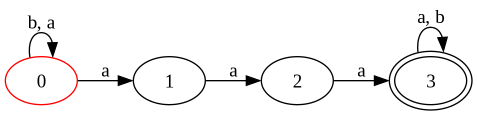

In [20]:
#CELLULE DE TEST
automate.show(1.2)

- `addTransition : Transition -> bool`<br>
  prend en argument une transition `t`, fait la mise à jour de
  l'automate en lui ajoutant `t` et ajoute les états impliqués
  dans l'automate s'ils en sont absents. Elle rend `True` si l'ajout a
  eu lieu, `False` sinon (si `t` était déjà présente dans l'automate).
  
- `removeTransition : Transition -> bool`<br>
  prend en argument une transition `t` et fait la mise à jour de
  l'automate en lui enlevant la transition, sans modifier les
  états. Elle rend `True` si la suppression a eu lieu, `False` sinon (si
  `t` était absente de l'automate).

- `addState : State -> bool`<br>
  prend en argument un état `s` et fait la mise à jour de
  l'automate en lui ajoutant `s`.  Elle rend `True` si l'ajout a eu
  lieu, `False` sinon (si `s` était déjà présent dans l'automate).

- `nextId : -> int`<br>
  renvoie un entier id frais, en choisissant l'entier le plus petit,
  strictement supérieur à tous les id des états de l'automate.

- `removeState : State -> bool`<br>
  prend en argument un état `s` et fait la mise à jour de
  l'automate en supprimant `s` ainsi que toutes ses transitions
  entrantes et sortantes.  Elle rend `True` si l'ajout a eu lieu, `False`
  sinon (si `s` était absent de l'automate).
  
- `getSetInitialStates :  -> set[State]`<br> 
  rend l'ensemble des états initiaux.

- `getSetFinalStates :  -> set[State]`<br>
  rend l'ensemble des états finaux.

- `getSetTransitionsFrom : State -> set[Transition]`<br>
  rend l'ensemble des transitions sortant de l'état passé en argument.

- `prefixStates : int -> NoneType`<br>
  modifie les identifiants et les étiquettes de tous les états de
  l'automate en les préfixant par l'entier passé en argument.

- `succElem : State x str -> set[State]`<br>
  étant donné un état `s` et un caractère `a`, elle rend l'ensemble des
  états successeurs de `s` par le caractère `a`.  Formellement,
  
  $$succElem(s, a) = \{s' \in S \mid  s \xrightarrow{a} s'\}.$$
  
  Cet ensemble peut contenir plusieurs états si l'automate n'est pas déterministe.

In [21]:
# Voilà le code de succElem

def succElem(self, state, lettre):
    """ State x str -> set[State]
        rend l'ensemble des états accessibles à partir d'un état state par l'étiquette lettre
    """
    successeurs = set()
    # t: Transitions
    for t in self.getSetTransitionsFrom(state):
        if t.etiquette == lettre:
            successeurs.add(t.stateDest)
    return successeurs

Automate.succElem = succElem

Avec l'exemple précédent, on obtient :

In [22]:
#CELLULE DE TEST
s0 = list(automate.getSetInitialStates())[0] ## on récupère l'état initial de automate
automate.succElem(s0, 'a')

{0(init), 1}

### 2. Prise en mains  <a class="anchor" id="sec2"></a>

#### 2.1 Création d'automates <a class="anchor" id="sec2_1"></a>

Soit l'automate $\mathcal{A}$ défini sur l'alphabet $\{ a,b \}$, d'états $0,1,2$, 
d'état initial 0, d'état final 2 et de transitions : <br>$(0,a,0)$, $(0,b,1)$, 
$(1,a,2)$, $(1,b,2)$, $(2,a,0)$ et $(2,b,1)$.

1. Créer l'automate $\mathcal{A}$ à l'aide de son ensemble de transitions. Pour cela, créer un état `s0`  
d'identifiant $0$
  qui soit initial, un état `s1` d'identifiant $1$ et un état
  `s2` d'identifiant $2$ qui soit final. Puis créer `t1`, `t2`, `t3`, `t4`, `t5` et
  `t6` les 6 transitions de l'automate. Créer enfin l'automate
  `auto` à partir de ses transitions, par exemple avec l'appel<br>
  `auto = Automate({t1,t2,t3,t4,t5,t6})`.<br>
  Vérifier que l'automate correspond bien à $\mathcal{A}$ en l'affichant.

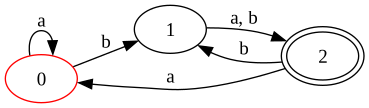

In [23]:
#CELLULE DE TEST
s0 = State(0, True, False)
s1 = State(1, False, False)
s2 = State(2, False, True)
t1 = Transition(s0,"a",s0)
t2 = Transition(s0,"b",s1)
t3 = Transition(s1,"a",s2)
t4 = Transition(s1,"b",s2)
t5 = Transition(s2,"a",s0)
t6 = Transition(s2,"b",s1)
auto = Automate({t1,t2,t3,t4,t5,t6})
auto.show()

2. Créer l'automate $\mathcal{A}$ à l'aide de sa liste de
  transitions et d'états, par exemple à l'aide de l'appel<br>
  `auto1 = Automate({t1,t2,t3,t4,t5,t6}, {s0,s1,s2})`<br>
  puis afficher l'automate obtenu à l'aide de `print` puis à l'aide de `show`.
  Vérifier que l'automate `auto1` est bien
  identique à l'automate `auto`.

Etats :
  0(init)
  1
  2(fin)
Transitions :
  [1-b->2(fin)]
  [2(fin)-a->0(init)]
  [0(init)-a->0(init)]
  [2(fin)-b->1]
  [1-a->2(fin)]
  [0(init)-b->1]



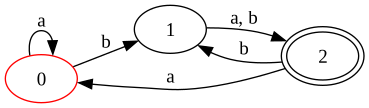

In [24]:
#CELLULE DE TEST
auto1 = Automate({t1,t2,t3,t4,t5,t6}, {s0,s1,s2})
print(auto1)
auto1.show()

3. Créer l'automate $\mathcal{A}$ à partir d'un fichier. Pour cela,
  créer un fichier `auto2.txt`, dans lequel sont indiqués les
  listes des états et des transitions, ainsi que l'état initial et
  l'état final, en respectant la syntaxe donnée dans la section
  précédente. Par exemple la liste d'états est décrite par la ligne
  `#E: 0 1 2`.  Utiliser ensuite par exemple l'appel
  `auto2 = Automate.creationAutomate("ExemplesAutomates/auto2.txt")`, puis afficher
  l'automate `auto2` à l'aide de `print` ainsi qu'à l'aide de `show`.

Etats :
  0(init)
  1
  2(fin)
Transitions :
  [1-b->2(fin)]
  [1-a->2(fin)]
  [0(init)-a->0(init)]
  [2(fin)-a->0(init)]
  [2(fin)-b->1]
  [0(init)-b->1]



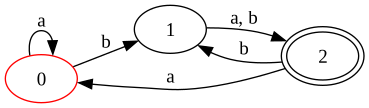

In [25]:
#CELLULE DE TEST
auto2 = Automate.creationAutomate("ExemplesAutomates/auto2.txt")
print(auto2)
auto2.show()

#### 2.2 Premières manipulations <a class="anchor" id="sec2_2"></a>

1. Appeler la fonction `removeTransition` sur l'automate
  `auto` en lui donnant en argument la transition $(0,a,1)$. Il
  s'agit donc de créer une variable `t` de type
  `Transition` représentant $(0,a,1)$ et d'effectuer l'appel
  `auto.removeTransition(t)`. Observer le résultat sur un
  affichage.  Appeler ensuite cette fonction sur `auto` en lui
  donnant en argument la transition `t1`. Observer le résultat
  sur un affichage. Appeler la fonction `addTransition` sur
  l'automate `auto` en lui donnant en argument la transition
  `t1`. Vérifier que l'automate obtenu est bien le même
  qu'initialement.

Etats :
  0(init)
  1
  2(fin)
Transitions :
  [1-b->2(fin)]
  [2(fin)-a->0(init)]
  [0(init)-a->0(init)]
  [2(fin)-b->1]
  [1-a->2(fin)]
  [0(init)-b->1]



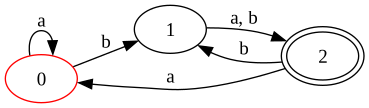

Etats :
  0(init)
  1
  2(fin)
Transitions :
  [1-b->2(fin)]
  [2(fin)-a->0(init)]
  [2(fin)-b->1]
  [1-a->2(fin)]
  [0(init)-b->1]



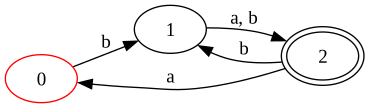

In [26]:
#CELLULE DE TEST
t = Transition(s0,"a",s1)
auto.removeTransition(t)
print(auto)
auto.show() # on obtient le méme affichage car il y'a pas de transition (0,a,0) dans auto .
auto.removeTransition(t1)
print(auto)
auto.show() # on remarque que la transition t1 est supprimer .

Etats :
  0(init)
  1
  2(fin)
Transitions :
  [1-b->2(fin)]
  [2(fin)-a->0(init)]
  [0(init)-a->0(init)]
  [2(fin)-b->1]
  [1-a->2(fin)]
  [0(init)-b->1]



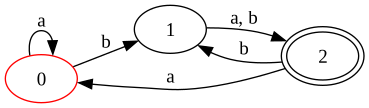

In [27]:
#CELLULE DE TEST
auto.addTransition(t1)
print(auto)
auto.show() #l'automate obtenu est bien le méme qu'initialement .

2. Appeler la fonction `removeState` sur l'automate
  `auto` en lui donnant en argument l'état
  `s1`. Observer le résultat. Appeler la fonction
  `addState` sur l'automate `auto` en lui donnant en
  argument l'état `s1`. Créer un état `s0bis` d'identifiant
  $0$ et initial. Appeler la fonction `addState` sur
  `auto` avec `s0bis` comme argument. Observer le résultat.

Etats :
  0(init)
  2(fin)
Transitions :
  [2(fin)-a->0(init)]
  [0(init)-a->0(init)]



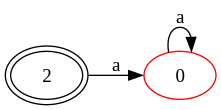

Etats :
  0(init)
  1
  2(fin)
Transitions :
  [2(fin)-a->0(init)]
  [0(init)-a->0(init)]



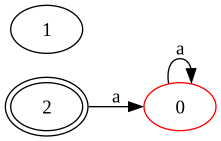

Etats :
  0(init)
  1
  2(fin)
Transitions :
  [2(fin)-a->0(init)]
  [0(init)-a->0(init)]



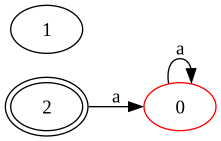

In [28]:
#CELLULE DE TEST
auto.removeState(s1)
print(auto)
auto.show() #l'état s1 est supprimer et les transitions entre s1 et les autres états aussi.
auto.addState(s1)
print(auto)
auto.show() # l'état s1 est ajouter a l'automate mais les transitions entre s1 et les autres états ne sont pas ajouter.
s0bis = State(0, True, False)
auto.addState(s0bis)
print(auto)
auto.show() #vue qu'on a déja un état initial avec l'identifiant 0, l'automate n'a pas était modifier.

3. Appeler la fonction `getSetTransitionsFrom` sur
  l'automate `auto1` avec `s1` comme argument. Afficher
  le résultat.

In [29]:
#CELLULE DE TEST
auto1.getSetTransitionsFrom(s1)

{[1-a->2(fin)], [1-b->2(fin)]}

### 3. Exercices de base : tests et complétion  <a class="anchor" id="sec3"></a>

1. Donner une définition de la fonction `succ`
  qui, étant donné un ensemble d'états $S$ et une chaîne de caractères
      $a$ (de longueur 1), renvoie l'ensemble des états successeurs de tous les états de $L$ par le caractère $a$. Cette fonction doit généraliser la fonction `succElem` pour qu'elle prenne en paramètre un ensemble d'états au lieu d'un seul état.  Formellement, si $S$ est un ensemble d'états et $a$ une lettre,
  $$succ(S,a) = \bigcup_{s \in S}succ(s,a) = \{s' \in S \mid \text{il
    existe } s \in L \text{ tel que } s \xrightarrow{a} s'\}.$$

In [30]:
# A faire 

def succ(self, setStates, lettre):
    """ Automate x set[State] x str -> set[State]
        rend l'ensemble des états accessibles à partir de l'ensemble d'états setStates par l'étiquette lettre
    """
    ens=set()
    for etat in setStates:
        ens = ens | (self.succElem(etat,lettre)) 
    return ens

Automate.succ = succ

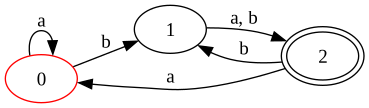

---


In [31]:
#CELLULE DE TEST
# On a défini auparavant un automate auto1, voilà les résultats le concernant, puis un jeu de tests :

auto1.show()
print('---')
assert auto1.succ({s0, s2}, 'b') == {s1}
assert auto1.succ({s0}, 'a') == {s0}
assert auto1.succ({s0, s1}, 'a') == {s0, s2}

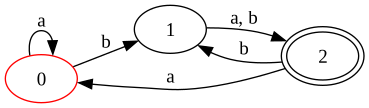

In [32]:
#CELLULE DE TEST
auto1.show()
assert auto1.succ({s0, s2}, 'a') == {s0 , s0}
assert auto1.succ({s0}, 'b') == {s1}
assert auto1.succ({s0, s1}, 'b') == {s1, s2}

2. Donner une définition de la fonction `accepte`
  qui, étant donné une chaîne de caractères `mot`,
  renvoie un booléen qui vaut vrai si et seulement si `mot` est accepté par l'automate. Attention, noter que l'automate peut ne pas être déterministe.

In [33]:
# A faire 

def accepte(self, mot) :
    """ Automate x str -> bool
        rend True si auto accepte mot, False sinon
    """
    etat_courant = self.getSetInitialStates()
    i=0
    next_etat=set()
    while i<len(mot):
        c=mot[i]
        next_etat = self.succ(etat_courant,c)
        if next_etat is None :
            return False
        etat_courant = next_etat
        i+=1
    for etat in etat_courant :
        if etat in self.getSetFinalStates():
            return True 
        else :
            return False

Automate.accepte = accepte

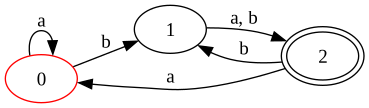

---


In [34]:
#CELLULE DE TEST
# On a défini auparavant un automate auto1, voilà les résultats le concernant, puis un jeu de tests :

auto1.show()
print('---')
assert auto1.accepte('aa') == False
assert auto1.accepte('ab') == False
assert auto1.accepte('aba') == True

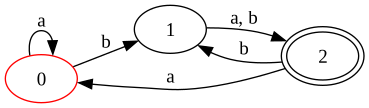

---


In [35]:
#CELLULE DE TEST
# Fournir un autre jeu de tests
auto1.show()
print('---')
assert auto1.accepte('abaa') == False
assert auto1.accepte('baba') == True
assert auto1.accepte('abab') == False

3. Donner une définition de la fonction `estComplet`
    qui, étant donné un automate `auto` et un ensemble de caractères `Alphabet`
    renvoie un booléen qui vaut vrai si et
    seulement si `auto` est complet par rapport à l'alphabet.
    
    On n'effectuera pas la vérification sur les états non accessibles depuis les états initiaux.

In [36]:
# A faire 

def estComplet(self, Alphabet) :
    """ Automate x set[str] -> bool
        rend True si auto est complet pour les lettres de Alphabet, False sinon
        hyp : les éléments de Alphabet sont de longueur 1
    """
    
    for s in self.allStates:                #On parcours les états de l'automate
        for i in Alphabet:
            if self.succElem(s, i) == set():   #On verifie pour chaque état si il contient au moins une transition avec i
                return False
    
    return True


Automate.estComplet = estComplet

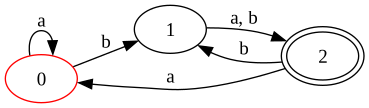

---


In [37]:
#CELLULE DE TEST
# On a défini auparavant un automate auto1, voilà les résultats le concernant, puis un jeu de tests :

auto1.show()
print('---')
assert auto1.estComplet({'a', 'b'}) == True
assert auto1.estComplet({'a', 'c', 'b'}) == False

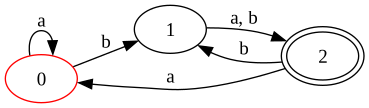

---


In [38]:
#CELLULE DE TEST
# Fournir un autre jeu de tests
auto1.show()
print('---')
assert auto1.estComplet({'a'}) == True
assert auto1.estComplet({'b'}) == True
assert auto1.estComplet({'a', 'd', 'b'}) == False

4. Donner une définition de la fonction `estDeterministe`
qui, étant donné un automate `auto`,
 renvoie un booléen qui vaut vrai si et seulement si `auto` est déterministe.

In [39]:
# A faire 

def estDeterministe(self) :
    """ Automate -> bool
        rend True si auto est déterministe, False sinon
    """
    
    if(len(self.getSetInitialStates()) > 1):    # Si on a plus d'un état initial
        return False

    # l'alphabet de l'automate
    Alphabet = set()
    for t in self.allTransitions:
        Alphabet.add(t.etiquette)
    
    for s in self.allStates:                   
        for i in Alphabet: 
            if (len(self.succElem(s,i)) > 1):     # Si il y'a plus d'un element successeur d'un état pour la meme lettre
                return False    

    return True
    
Automate.estDeterministe = estDeterministe

L'appel de fonction `copy.deepcopy(auto)` renvoie un nouvel automate identique à `auto`.

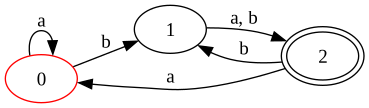

---


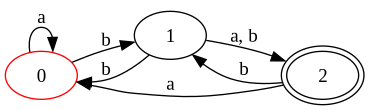

---


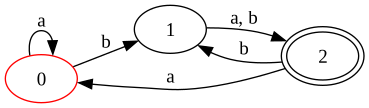

---


In [40]:
#CELLULE DE TEST
# On a défini auparavant un automate auto1, voilà les résultats le concernant, puis un jeu de tests :

auto1.show()
print('---')
assert auto1.estDeterministe() == True

auto1bis = copy.deepcopy(auto1)
#t : Transition
t = Transition(s1, 'b', s0)
auto1bis.addTransition(t)
auto1bis.show()
print('---')
assert auto1bis.estDeterministe() == False

auto1bis.removeTransition(t)
auto1bis.show()
print('---')
assert auto1bis.estDeterministe() == True

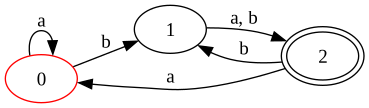

---


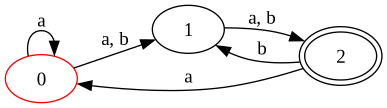

---


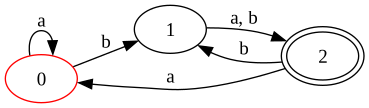

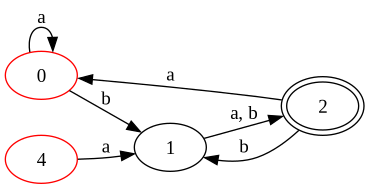

In [41]:
#CELLULE DE TEST
# Fournir un autre jeu de tests

#t : Transition
auto1.show()
print('---')
assert auto1.estDeterministe() == True

auto1bis = copy.deepcopy(auto1)

t = Transition(s0, 'a', s1)
auto1bis.addTransition(t)
auto1bis.show()
print('---')
assert auto1bis.estDeterministe() == False
auto1bis.removeTransition(t)
assert auto1bis.estDeterministe() == True
auto1.show()
s4 = State(4,True,False)
auto1bis.addState(s4)
t4 = Transition(s4,'a',s1)
auto1bis.addTransition(t4)
auto1bis.show()
assert auto1bis.estDeterministe() == False

5. Donner une définition de la fonction `completeAutomate`
qui, étant donné un automate `auto` et l'ensemble alphabet d'entrée `Alphabet`,
renvoie l'automate complété d'`auto`.
  
Attention, il ne faut pas modifier `auto`, mais construire un nouvel automate.
<br>Il pourra être intéressant d'utiliser l'appel de fonction
`copy.deepcopy(auto)` qui renvoie un nouvel automate identique à `auto`.
<br>On pourra faire appel à la fonction `nextId` afin de construire l'état $\bot$.

In [42]:
# A faire

def completeAutomate(self, Alphabet) :
    """ Automate x str -> Automate
        rend l'automate complété de self, par rapport à Alphabet
    """        
    if(self.estComplet(Alphabet)):   # Si l'automate est déja complet
        return self
    
    auto = copy.deepcopy(self)      # Copie de l'automate
    suiv = auto.nextId()            
    puit = State(suiv,False,False,"puit")  # Création de l'état puit 
    auto.addState(puit)
    
    for s in auto.allStates:                   
        for i in Alphabet:
            if (self.succElem(s, i) == set()):        # Si une transition est manquante
                t = Transition(s,i,puit)              
                auto.addTransition(t)               # Ajout de la transition vers le puit
                
    for j in Alphabet:
        boucle = Transition(puit,j,puit)           # On crée une boucle avec tout l'alphabet pour éviter de sortir du puit
        auto.addTransition(boucle)
    
    
    return auto

Automate.completeAutomate = completeAutomate

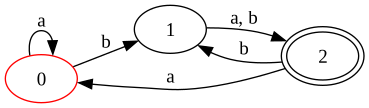

---


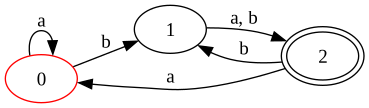

---


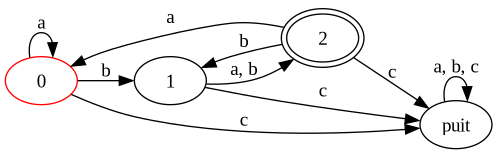

In [43]:
#CELLULE DE TEST
# On a défini auparavant un automate auto1, voilà les résultats le concernant :

auto1.show()
print('---')
assert auto1.estComplet({'a', 'b'}) == True
auto1complet = auto1.completeAutomate({'a', 'b'})
auto1complet.show()
assert auto1complet.estComplet({'a', 'b'}) == True

print('---')
assert auto1.estComplet({'a', 'b', 'c'}) == False
auto1complet = auto1.completeAutomate({'a', 'b', 'c'})
auto1complet.show()
assert auto1complet.estComplet({'a', 'b','c'}) == True

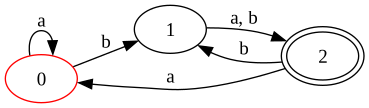

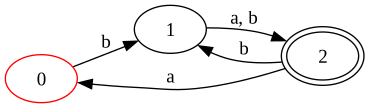

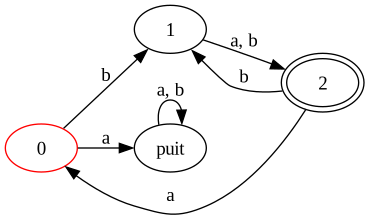

In [44]:
#CELLULE DE TEST
# Fournir un autre jeu de tests
auto1.show()
autocp = copy.deepcopy(auto1)
t = Transition(s0,'a',s0)
autocp.removeTransition(t)
autocp.show()
assert autocp.estComplet({'a','b'}) == False
assert autocp.estComplet({'b'}) == True
autocomp = completeAutomate(autocp,{'a','b'})
autocomp.show()
assert autocomp.estComplet({'a','b'}) == True


### 4. Déterminisation  <a class="anchor" id="sec4"></a>

1. Donner une définition de la fonction `newLabel`
qui, étant donné un ensemble d'états renvoie une *chaîne de caractères* représentant l'ensemble de tous les labels des états.
Par exemple, l'appel de `newLabel` sur un ensemble de 3 états dont les labels sont `'1', '2', '3'` renvoie `'{1,2,3}'`

Afin d'être assuré que l'ordre de parcours de l'ensemble des états n'a pas d'importance, il sera nécessaire de trier par ordre alphabétique la liste des `label` des états. On pourra faire appel à `L.sort()` qui étant donné la liste `L` de chaînes de caractères, la trie en ordre alphabétique.

In [45]:
# A faire

def newLabel(S):
    """ set[State] -> str
    """
    l = []
    for s in S:           #Ajout des états dans la liste
        l.append(s.label)
        
    l.sort()       #Tri de la liste
    res ='{'
    
    for i in range(len(l)-1):  #On s'arrete a l'avant dernier caractere pour pas avoir une virgule en trop
        res += l[i]+','
        
    res += l[len(l)-1]+'}'    #On ajoute alors le dernier caractére es la l'accolade fermante
        
    return res


In [46]:
#CELLULE DE TEST
# On a défini auparavant un automate auto1, voilà un test le concernant :

assert newLabel(auto1.allStates) == '{0,1,2}'

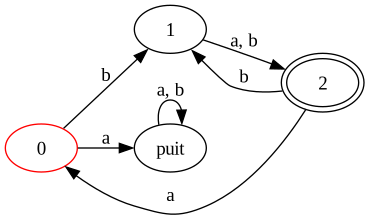

{0,1,2,puit}


In [47]:
#CELLULE DE TEST
# Fournir un autre jeu de tests
autocomp.show()
print(newLabel(autocomp.allStates))
assert newLabel(autocomp.allStates) == '{0,1,2,puit}'

La fonction suivante permet de déterminiser un automate. On remarque qu'un état peut servir de clé dans un dictionnaire.

In [48]:
def determinisation(self) :
    """ Automate -> Automate
    rend l'automate déterminisé de self """
    # Ini : set[State]
    Ini = self.getSetInitialStates()
    # fin : bool
    fin = False
    # e : State
    for e in Ini:
        if e.fin:
            #etat initial est acceptant
            fin = True
    #creation de l'etiquette de l'etat initial
    lab = newLabel(Ini)
    #creation de l'etat initial
    s = State(0, True, fin, lab)
    A = Automate(set())
    #ajout de l'etat initial a l'automate determinise
    A.addState(s)
    Alphabet = {t.etiquette for t in self.allTransitions}
    #dictionnaire associant a un etat de l'automate determinise l'ensemble des etats de l'automate initial qu'il represente
    Etats = dict()
    Etats[s] = Ini
    A.determinisation_etats(self, Alphabet, [s], 0, Etats, {lab})
    return A

L'automate déterminisé est construit dans `A`. Pour cela la fonction `determinisation_etats` modifie en place l'automate `A`, et prend en outre les paramètres suivants :
- `auto`, qui est l'automate de départ à déterminiser
- `Alphabet` qui contient l'ensemble des lettres étiquetant les transistions de l'automate de départ
- `ListeEtatsATraiter` qui est la liste des états à ajouter et à traiter dans `A` au fur et à mesure que l'on progresse dans `auto`. Initialement cette liste ne contient donc que l'état initial.
- `i` qui est l'indice de l'état en cours de traitement (dans la liste `ListeEtatsATraiter`).
- `Etats` qui est un dictionnaire dont les clés sont les états de `A` et les valeurs associées sont l'ensemble d'états issus de `auto` que cette clé représente.
- `DejaVus` est l'ensemble des labels d'états de `A` déjà vus.

La fonction `determinisation_etats` peut être récursive ou non. Le paramètre `i` n'est utile que si vous programmez une fonction récursive. Dans tous les cas, **ne modifiez pas la signature de la fonction**.

In [49]:
# A faire 

def determinisation_etats(self, auto, Alphabet, ListeEtatsATraiter, i, Etats, DejaVus):
    """ Automate x Automate x set[str] x list[State] x int x dict[State : set[State]], set[str] -> NoneType
    """
    etat = set()
    if(i<len(ListeEtatsATraiter)):       #Tant que on a pas fini de parcourir tout les états
        
        for lettre in Alphabet:           #Traitement pour chaque lettre de l'alphabet de l'automate
            etat = Etats[ListeEtatsATraiter[i]]      #Les états courants qu'on souhaite traiter
            lab = newLabel(auto.succ(etat,lettre))   #L'ensemble des états successeur par la transition 'lettre'
            
            
            if((lab in DejaVus) or lab==newLabel(etat)):          #Si ce label est déja vu ou si l'etat renvoi vers lui meme  
                for j in ListeEtatsATraiter:                       #On parcours les états déja vus 
                    if (j.label == lab):
                        t = Transition(ListeEtatsATraiter[i], lettre, j)
                        self.addTransition(t)                        #On ajoute alors la transition entre l'etat courant et l'etat déja vu
                        
            else:
                
                fin = False
                for e in auto.succ(etat,lettre):      #pour vérifier si un des états est final    
                    if (e.fin):
                        fin = True
                        
                s = State(self.nextId(),False,fin,lab)      #On crée le nouvel état de l'automate détérminisé
                Etats[s] = auto.succ(etat,lettre)            #On l'ajoute au dictionnaire avec l'ensemble des états de base le constituant
                self.addState(s)                             #On l'ajoute à l'automate
                ListeEtatsATraiter.append(s)                  #On l'ajoute a la liste des états a traiter ultérieurement
                t = Transition(ListeEtatsATraiter[i],lettre,s)    
                self.addTransition(t)                      # On ajoute la transition entre l'etat courant au nouvel état par la lettre courante
                DejaVus.add(lab)          #Et on oublie pas de le rajouter a l'ensemble des états déja vu 


        #Récursion : On refait la meme chose en incrémentant i de 1 pour avancer dans la liste des états a traiter jusqu'a ce que i soit superieur a la longueur de cette liste
        self.determinisation_etats(auto,Alphabet,ListeEtatsATraiter,i+1,Etats,DejaVus) 

Automate.determinisation_etats = determinisation_etats
Automate.determinisation = determinisation

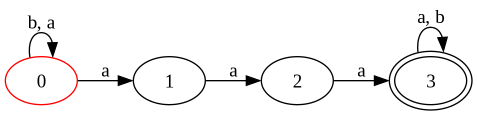

True


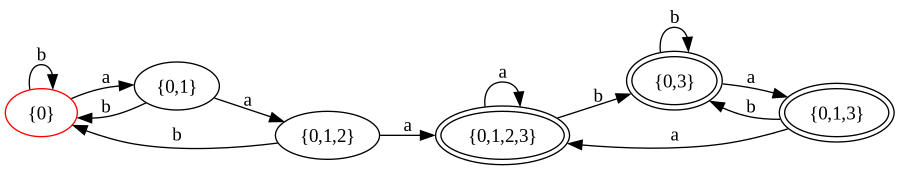

In [50]:
#CELLULE DE TEST
# Voici un test
#automate est l'automate construit plus haut a partir du fichier exempleAutomate.txt
automate = Automate.creationAutomate("ExemplesAutomates/exempleAutomate.txt")
automate.show()
auto_det = automate.determinisation()
print(auto_det.estDeterministe())
auto_det.show(2)

auto 1 :


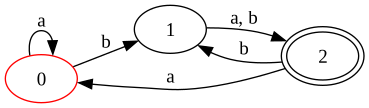

ajout d'une transition


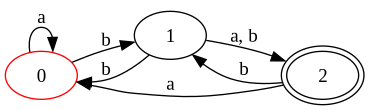

determinisation de l'automate :
True


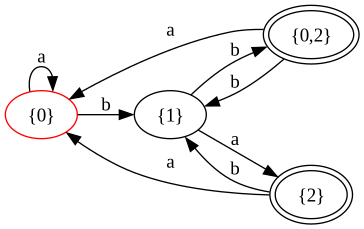

In [51]:
#CELLULE DE TEST
#Fournir d'autres jeux de tests
print('auto 1 :')
auto1.show()

print('ajout d\'une transition')
auto1nondet = copy.deepcopy(auto1)
t = Transition(s1, 'b', s0)
auto1nondet.addTransition(t)
auto1nondet.show()

print('determinisation de l\'automate :')
auto1det = auto1nondet.determinisation()
print(auto1det.estDeterministe())
auto1det.show()

### 5. Constructions sur les automates réalisant  des opérations sur les langages acceptés <a class="anchor" id="sec5"></a>


#### 5.1 Opérations ensemblistes sur les langages <a class="anchor" id="sec5_1"></a>

1. Donner une définition de la fonction `complementaire` qui, étant donné un automate `auto` et un ensemble de caractères `Alphabet`, renvoie l'automate acceptant la langage complémentaire du langage accepté par `auto`. Ne pas modifier l'automate `auto`, mais construire un nouvel automate.

In [52]:
#A faire

def complementaire(self, Alphabet):
    """ Automate -> Automate
        rend  l'automate acceptant pour langage le complémentaire du langage de self
    """
    
    autodet = self.determinisation()
    auto = autodet.completeAutomate(Alphabet)
    for i in auto.allStates:
        if not i.fin :
            i.fin=True
        else :
            i.fin=False
    return auto

    

Automate.complementaire = complementaire   

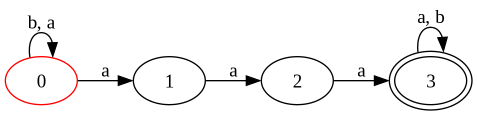

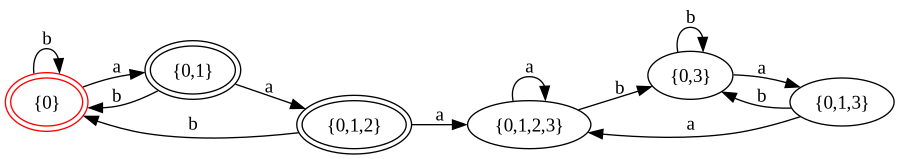

In [53]:
#CELLULE DE TEST
# Voici un test

automate = Automate.creationAutomate("ExemplesAutomates/exempleAutomate.txt")
automate.show()
Alphabet = {t.etiquette for t in auto.allTransitions}
auto_compl = automate.complementaire(Alphabet)
auto_compl.show(2)

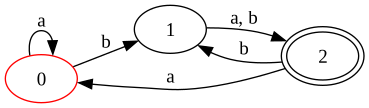

Complementaire : 


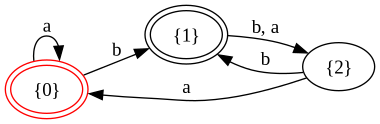

In [54]:
#CELLULE DE TEST
#Fournir d'autres tests
auto1.show()
print('Complementaire : ')
Alphabet ={t.etiquette for t in auto1.allTransitions}
autocomp = auto1.complementaire(Alphabet)
autocomp.show()

2. Donner une définition de la fonction `intersection` qui, étant donné deux automates `auto1` et `auto2`, renvoie l'automate acceptant l'intersection des langages acceptés par `auto1` et `auto2`.

L'automate construit ne doit pas avoir d'état non accessible depuis l'état initial.

In [55]:
#A faire


def intersection(self, auto):
    """ Automate x Automate -> Automate
    rend l'automate acceptant pour langage l'intersection des langages des deux automates
    """
    # QUELQUES VARIABLES POUR SIMPLIFIER 
    
    Alphabet = set()  #On construit l'alphabet de l'automate resultant
    for t in self.allTransitions :
        Alphabet.add(t.etiquette)
    for t in auto.allTransitions :
        Alphabet.add(t.etiquette)
    #Les ensembles d'états initiaux et finaux
    iniA = self.getSetInitialStates()
    iniB = auto.getSetInitialStates()
    finA = self.getSetFinalStates()
    finB = auto.getSetFinalStates()
    
    
    # CREATION DES ETATS
    i = 0
    L = dict()
    for etatA in self.allStates:
        for etatB in auto.allStates:
            lab = "("+etatA.label+","+etatB.label+")"        #Le label du nouvel état (Le couple etat de self avec etat de auto)
            s = State(i,etatA in iniA and etatB in iniB,etatA in finA and etatB in finB,lab)  #On crée l'état (initial/final si etatA ET etatB sont initiaux/finaux)
            i += 1                      #On incrémente i pour l'id de l'etat prochain
            L[(etatA,etatB)] = s        #On stock l'état crée dans un dictionnaire 
            
            
                                # CREATION DES TRANSITIONS
    Transitions = set()
    for tA in self.allTransitions:
        for tB in auto.allTransitions:
            if(tA.etiquette == tB.etiquette):       #Si les états ont une étiquette en commun
                t = Transition(L[(tA.stateSrc,tB.stateSrc)],tA.etiquette, L[(tA.stateDest,tB.stateDest)]) #On crée une transition telle qu'elle est définie dans le cours
                Transitions.add(t)   #On ajoute la transition a notre ensemble qui servira pour construire l'autoamte
                
                
                                # CREATION DE L'AUTOMATE
    inter = Automate(Transitions)   

        
                                # TRI DE L'AUTOMATE
    etatsAccess = inter.getSetInitialStates()      # On cherche a créer l'ensemble des états accessibles depuis les états initiaux
    i = 1
    while i!=0:                  
        i = len(etatsAccess)     
        for lettre in Alphabet:
            etatsAccess.update(inter.succ(etatsAccess,lettre))      #On ajoute les successuer à etatAccess
        i = i-len(etatsAccess)   #Si i=0, c'est a dire que y a rien qui a été ajouté a l'ensemble etatsValide, alors on a fini d'explorer les états qui seront dans l'automate résultat
        
    etatsSupp = inter.allStates-etatsAccess     #Les états supp sont donc ceux qui restent, on fait alors la difference entre tout les états et les états valides
    for s in etatsSupp:
        inter.removeState(s)       #On retire les états non valides
            
 
    return inter
    
Automate.intersection = intersection

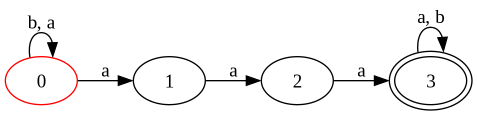

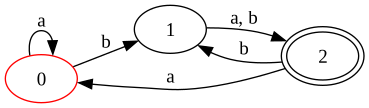

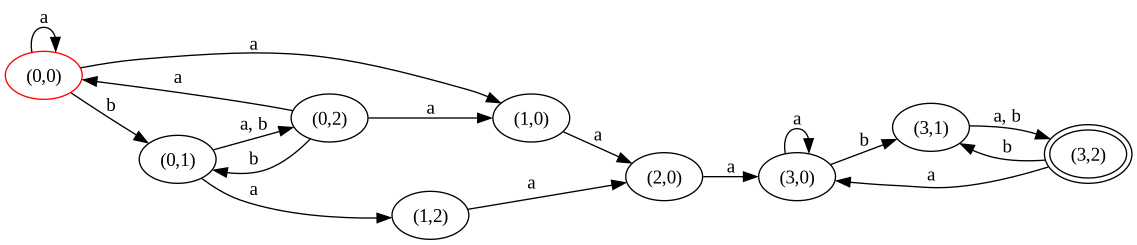

In [56]:
#CELLULE DE TEST
#Un premier test

automate.show()
auto2.show()
inter = automate.intersection(auto2)
inter.show(2)

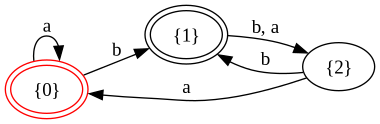

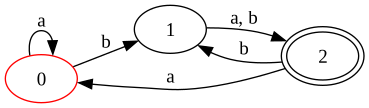

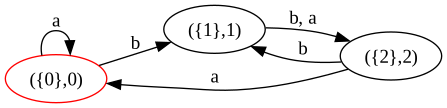

In [57]:
#CELLULE DE TEST
# Fournir d'autres tests
autocomp.show()
auto1.show()

autointer = autocomp.intersection(auto1)
autointer.show()

3. (Question facultative) Donner une définition de la fonction `union` qui, étant donné deux automates `auto1` `auto2`, renvoie l'automate acceptant comme langage l'union des langages acceptés par `auto1` et `auto2`.

In [58]:
#A faire par l'étudiant

def union (self, auto):
    """ Automate x Automate -> Automate
    rend l'automate acceptant pour langage l'union des langages des deux automates
    """
    res=copy.deepcopy(self)
    res1=copy.deepcopy(auto)
    res1.prefixStates(res.nextId())
    for i in res1.allStates:
        res.addState(i)
    for t in res1.allTransitions:
        res.addTransition(t)
    
    return res

Automate.union = union  


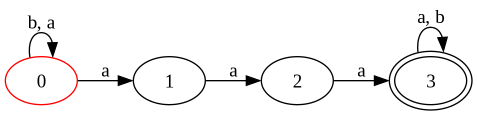

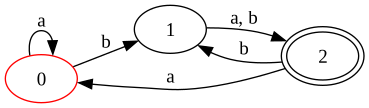

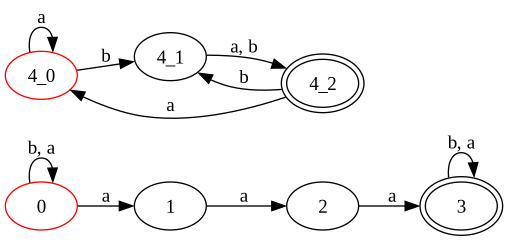

In [59]:
#CELLULE DE TEST
#Un premier test

automate.show()
auto2.show()
uni = automate.union(auto2)
uni.show(2)

#### 5.2 Opérations rationnelles sur les langages <a class="anchor" id="sec5_2"></a>

Programmer *une des deux* méthodes suivantes:

1. Donner une définition de la fonction `concatenation` qui, étant donné deux automates `auto1` et `auto2`, renvoie l'automate acceptant comme langage la concaténation des langages acceptés par `auto1` et `auto2`.

2. Donner une définition de la fonction `etoile` qui, étant donné un automate `auto`, renvoie l'automate acceptant comme langage l'étoile du langages accepté par `auto`.

In [66]:
# A faire



def concatenation (self, auto):
    """ Automate x Automate -> Automate
    rend l'automate acceptant pour langage la concaténation des langages des deux automates
    """
                 # On crée un automate composé de self et auto
    concat = copy.deepcopy(self)
    concat2=copy.deepcopy(auto)
    for s in concat2.allStates: #ajout des états du 2éme au 1er automate
        s.id = concat.nextId()
        s1=State(s.id,s.init,s.fin,concat.nextId())
        concat.addState(s1)
    for tr in concat2.allTransitions: #ajout des transitions du 2éme automate au 1er
        concat.addTransition(tr)
       
       
    ini = set()
    for etat in concat2.allStates: 
        if(etat.init):
            ini.add(etat)
   
             # On ajoute les transitions qu'il faut
    for t in self.allTransitions:
            if(t.stateDest.fin):      
                for i in ini:
                    newt = Transition(t.stateSrc,t.etiquette,i)
                    concat.addTransition(newt)
   
            # les états finaux de départ ne le sont plus
    for s in concat.allStates: 
        if(s in self.getSetFinalStates()):
            s.fin = False
           
    return concat

Automate.concatenation = concatenation

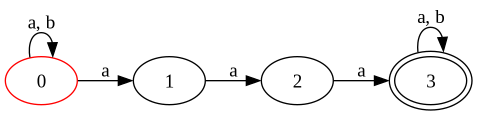

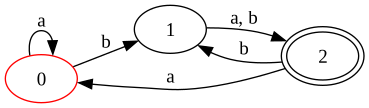

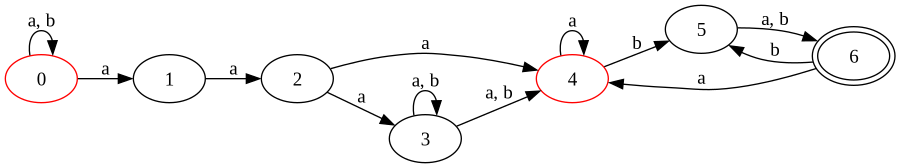

In [67]:
#CELLULE DE TEST
#Un premier test

automate.show()
auto2.show()
concat = automate.concatenation(auto2)
concat.show(2)

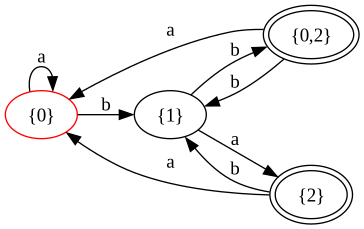

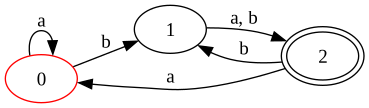

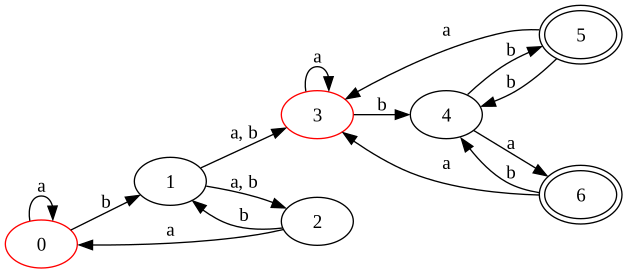

In [68]:
#CELLULE DE TEST
#Fournir un autre jeu de test
auto1det.show()
auto2.show()
test1=auto2.concatenation(auto1det)
test1.show()

In [70]:
def etoile (self):
    """ Automate  -> Automate
    rend l'automate acceptant pour langage l'étoile du langage de a
    """
    cop= copy.deepcopy(self)
    s=State(cop.nextId(),True,True)
    cop.addState(s)
    for i in self.getSetInitialStates(): 
        for t in self.allTransitions:
            if (t.stateDest==i and t.stateSrc==i):  #si il y'a une transition d'un état initial vers lui méme 
                for f in self.getSetFinalStates():
                    t1=Transition(f,t.etiquette,i)
                    cop.addTransition(t1)
            else:
                if (t.stateSrc==i and t.stateDest!=i): #si il y'a une transition d'un état initial vers un état différent 
                    for f in self.getSetFinalStates():
                        t2=Transition(f,t.etiquette,t.stateDest)
                        cop.addTransition(t2)
    
    return cop

Automate.etoile = etoile

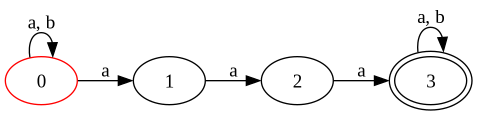

étoile


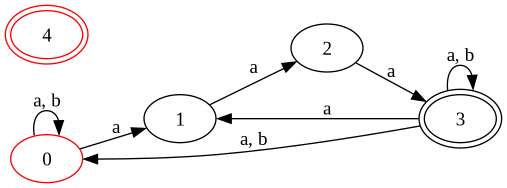

In [71]:
#CELLULE DE TEST
#Un premier test

automate.show()
autoetoile = automate.etoile()
print("étoile")
autoetoile.show()

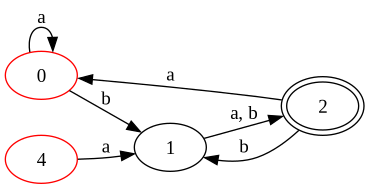

étoile


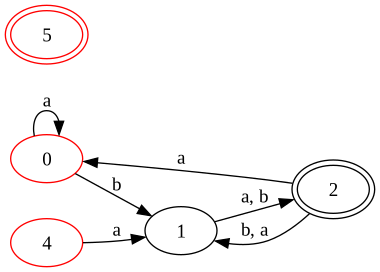

In [72]:
#CELLULE DE TEST
#Fournir un autre j eu de tests
auto1bis.show()
auto1etoile = auto1bis.etoile()
print("étoile")
auto1etoile.show()